In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor


In [48]:
# read data
df = pd.read_csv('dielectron.csv')
df.head(5)

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Run     100000 non-null  int64  
 1   Event   100000 non-null  int64  
 2   E1      100000 non-null  float64
 3   px1     100000 non-null  float64
 4   py1     100000 non-null  float64
 5   pz1     100000 non-null  float64
 6   pt1     100000 non-null  float64
 7   eta1    100000 non-null  float64
 8   phi1    100000 non-null  float64
 9   Q1      100000 non-null  int64  
 10  E2      100000 non-null  float64
 11  px2     100000 non-null  float64
 12  py2     100000 non-null  float64
 13  pz2     100000 non-null  float64
 14  pt2     100000 non-null  float64
 15  eta2    100000 non-null  float64
 16  phi2    100000 non-null  float64
 17  Q2      100000 non-null  int64  
 18  M       99915 non-null   float64
dtypes: float64(15), int64(4)
memory usage: 14.5 MB


In [50]:
# check null values
#df.isnull().sum()

In [51]:
# delete null values
df = df.dropna(axis=0)
df.isnull().sum()

Run      0
Event    0
E1       0
px1      0
py1      0
pz1      0
pt1      0
eta1     0
phi1     0
Q1       0
E2       0
px2      0
py2      0
pz2      0
pt2      0
eta2     0
phi2     0
Q2       0
M        0
dtype: int64

In [52]:
# check for duplicates
#df.duplicated().sum()

In [53]:
# delete duplicates
#df = df.drop_duplicates()
#df.duplicated().sum()

OUTLIERS


In [66]:
clf = LocalOutlierFactor()
clf.fit_predict(df)




[-1.78408724 -1.75412584 -1.74872489 -1.74523784 -1.64135268 -1.60718561
 -1.56757543 -1.55380947 -1.55273381 -1.52408264 -1.5128761  -1.49034213
 -1.49034213 -1.48319315 -1.48236155 -1.46819378 -1.45073347 -1.44615712
 -1.44536973 -1.44242954]
-1.7541258379233977


In [76]:
score = clf.negative_outlier_factor_
scoresorted = np.sort(score)
print(scoresorted[0:20])


point = scoresorted[4]
print(point)


[-1.78408724 -1.75412584 -1.74872489 -1.74523784 -1.64135268 -1.60718561
 -1.56757543 -1.55380947 -1.55273381 -1.52408264 -1.5128761  -1.49034213
 -1.49034213 -1.48319315 -1.48236155 -1.46819378 -1.45073347 -1.44615712
 -1.44536973 -1.44242954]
-1.6413526845969764


DATA VISUALIZATION


Histogram of the data


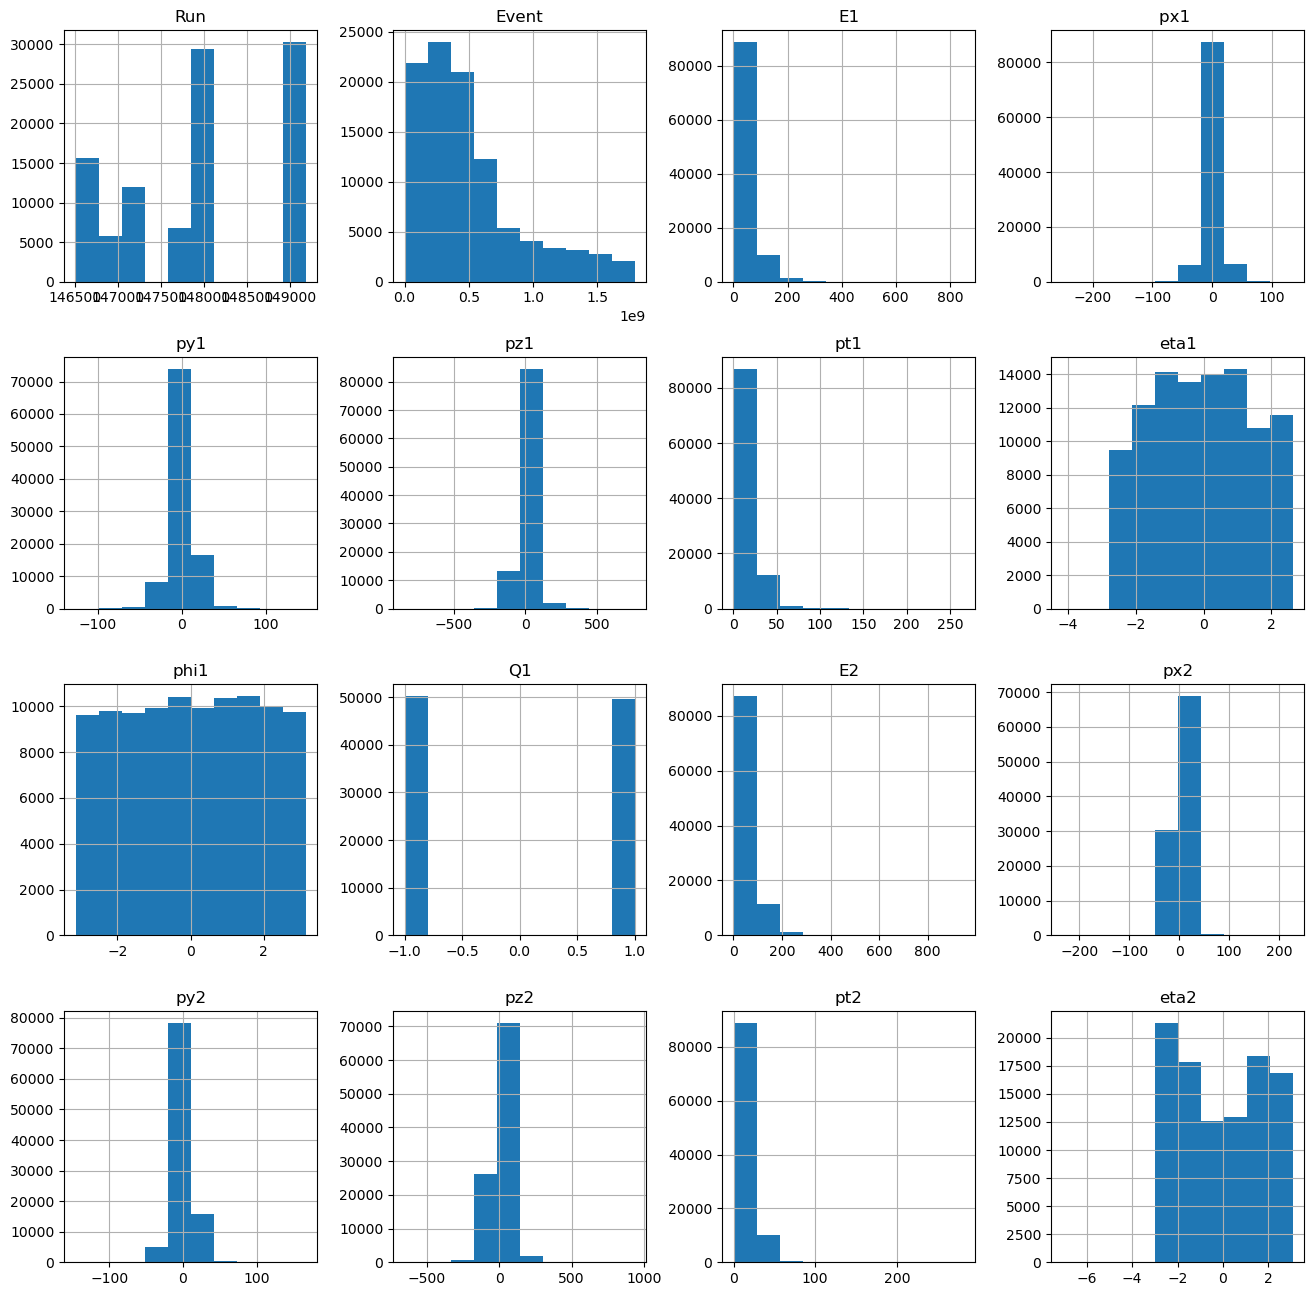

In [57]:
df.iloc[:,0:16].hist(figsize=(16,16))
plt.show()

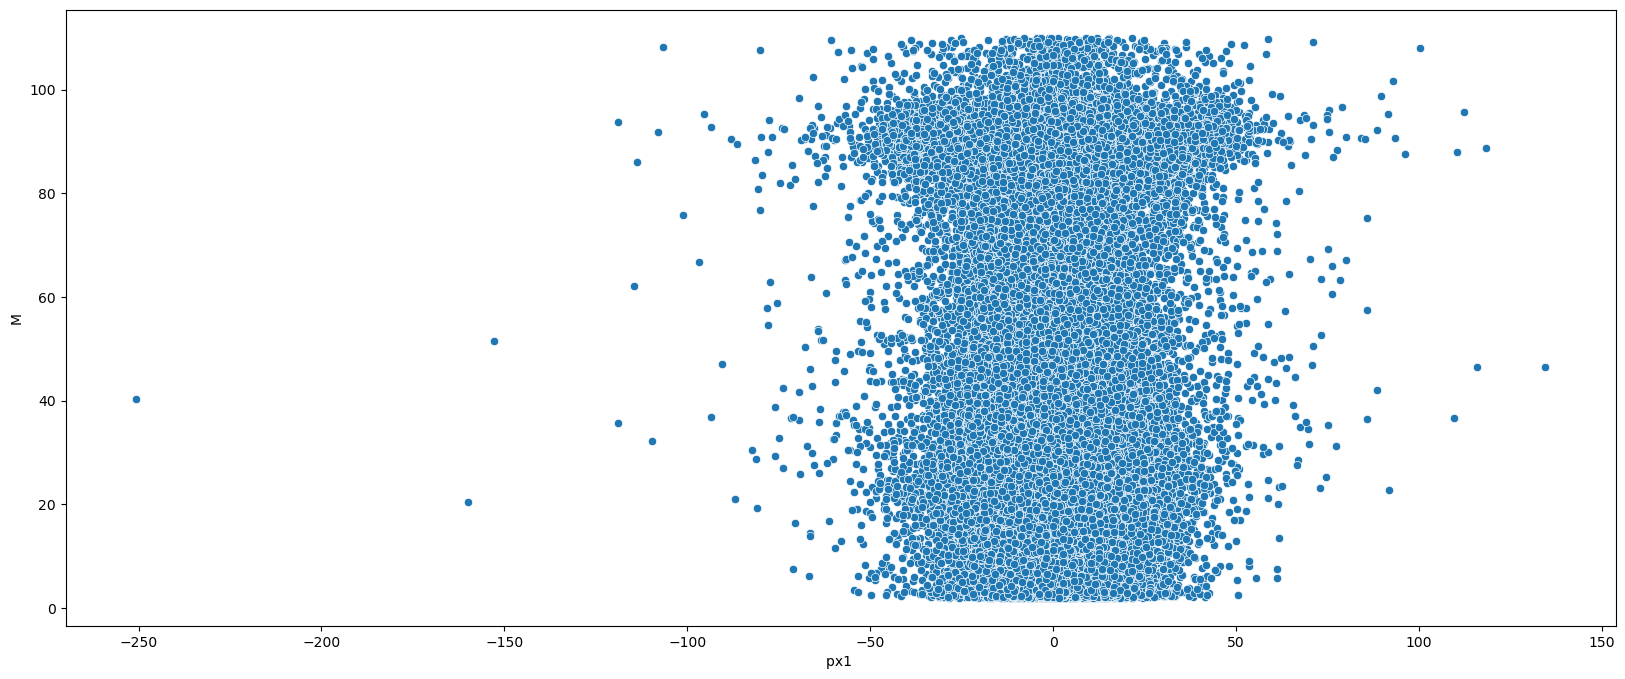

In [58]:
figure = plt.figure(figsize=(20,8))
sns.scatterplot(x="px1 ",y="M",data= df)
plt.show()


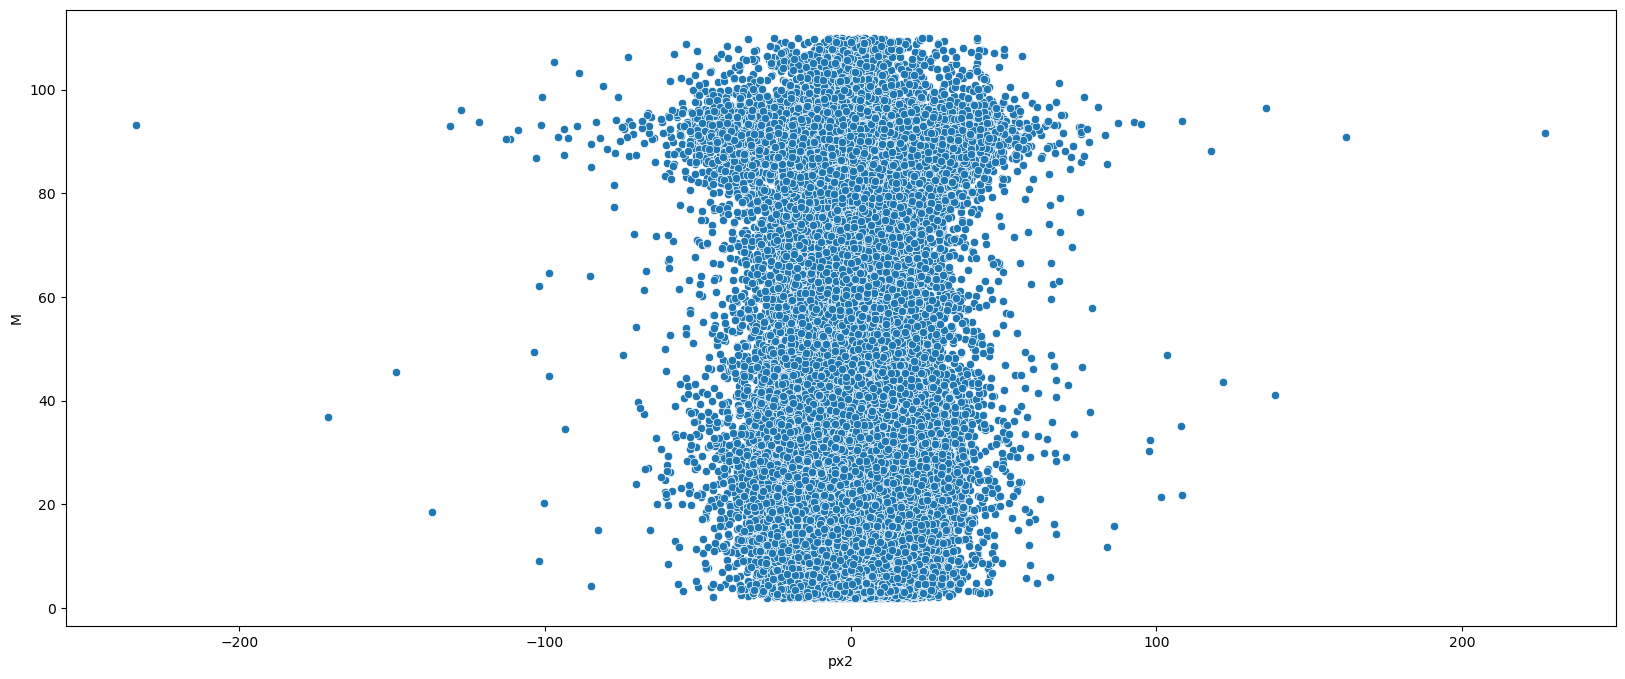

In [59]:
figure = plt.figure(figsize=(20,8))
sns.scatterplot(x="px2",y="M",data=df)
plt.show()

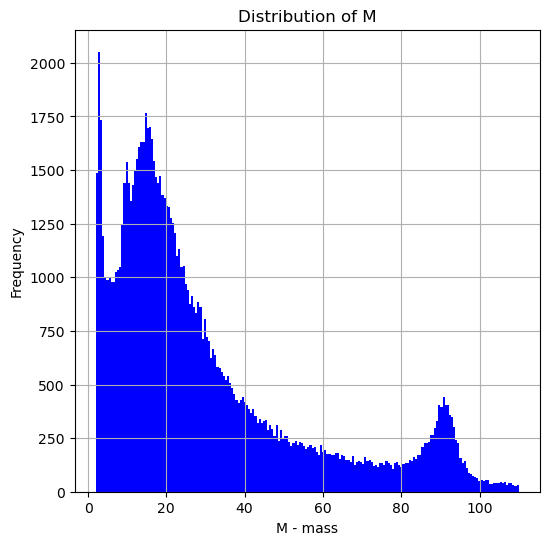

In [60]:
# plot distribution of mass
plt.figure(figsize=(6,6))
df.M.plot(kind='hist', bins=200, color='blue')
plt.title('Distribution of M')
plt.xlabel('M - mass')
plt.grid()
plt.show()

In [61]:
# generate data
features = df.drop(['M'], axis=1).to_numpy()
labels = df.M.to_numpy()

In [62]:
# split data into train, test and validation sets
X, X_test, y, y_test = train_test_split(features, labels, test_size=0.2,train_size=0.8)
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.25,train_size =0.75)
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((59949, 18), (59949,), (19983, 18), (19983,), (19983, 18), (19983,))

In [63]:
# standardize data
X_train_standardized = StandardScaler().fit_transform(X_train)


np.allclose(X_train.mean(axis=0), np.zeros(X_train.shape[1])),\
    np.allclose(X_train_standardized.mean(axis=0),np.zeros(X_train_standardized.shape[1])),\
        np.allclose(X_train.std(axis=0), np.ones(X_train.shape[1])),\
            np.allclose(X_train_standardized.std(axis=0), np.ones(X_train_standardized.shape[1]))

(False, True, False, True)

In [64]:
print(X_train_standardized.mean(axis=0))



[ 1.10124257e-14  3.26127666e-18  2.16736928e-16  4.01294445e-16
  1.89233796e-16 -1.99066124e-16 -5.44116695e-15 -2.22195539e-16
  1.60197021e-16 -9.31763966e-16  9.77221829e-16 -2.26631875e-17
 -1.92572275e-17 -1.20064891e-16  7.96145600e-15  2.14459035e-16
  1.36182839e-17 -3.49736272e-16]
